#### Week 4: Basic Machine Learning
* **Project Title:** Implementing a Simple Linear Regression Model
* Description: Use a dataset to create a linear regression model to predict a numerical outcome. Evaluate model performance and visualize the results.
* **Dataset Reference:** California Housing Prices Dataset

#### Project Overview
* **Goal:** Predict median_house_value using a single numerical feature.

* **Dataset:** California Housing Prices

* **Approach:** Simple Linear Regression

##### Steps:

* Data Preprocessing

* Exploratory Data Analysis (EDA)

* Model Implementation

* Performance Evaluation

* Visualization


#### 1. importing libraries 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


#### 2. Load the Dataset


In [31]:
df = pd.read_csv('Housing.csv')

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
df.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [32]:
(df.isnull().sum())/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

<Axes: >

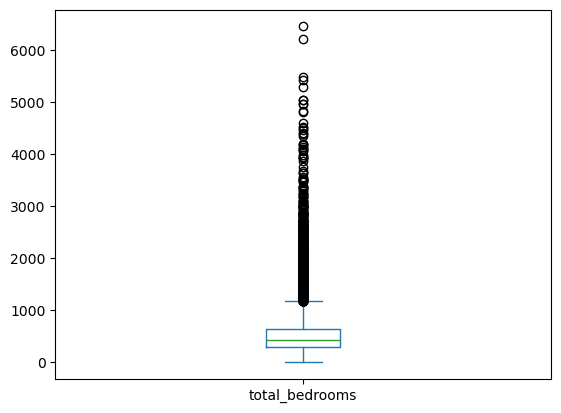

In [33]:
df['total_bedrooms'].plot(kind='box')

* Total bed room value have outlier so we can apply median to the missing value

In [34]:
# Handle missing values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

#### 3. Correlation Analysis
Let’s pick median_income to predict median_house_value, since it's strongly correlated.

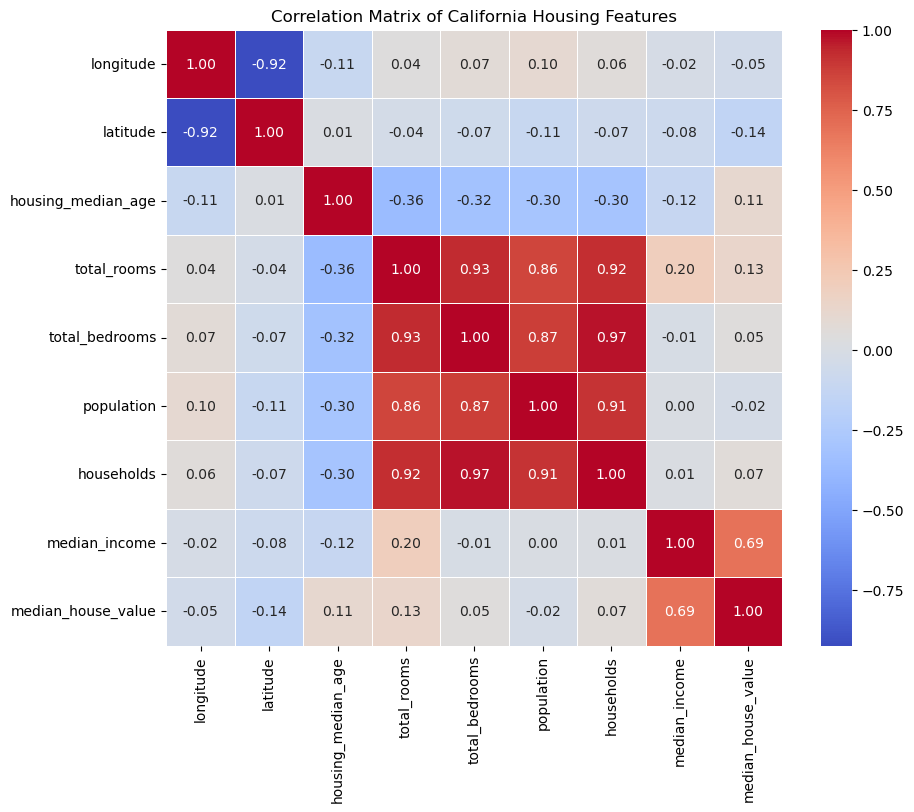

In [35]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

# Title
plt.title('Correlation Matrix of California Housing Features')

# Show the plot
plt.show()


In [36]:
correlation = df.corr(numeric_only=True)
correlation['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

#### Strongest Correlation:

* median_income (0.688) has the strongest positive correlation with median_house_value. This means as median income increases, the house value also tends to increase.

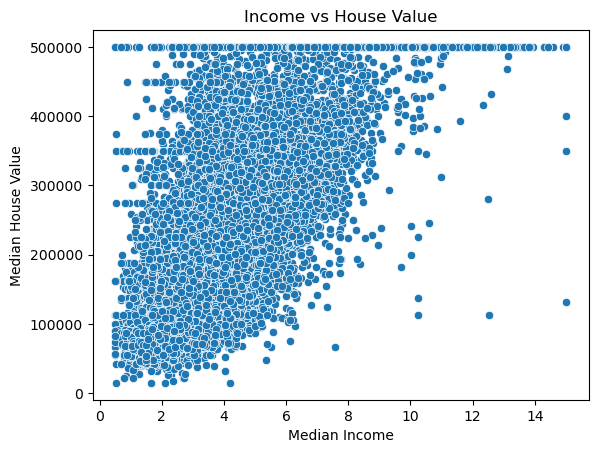

In [37]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


#### 4. Choose Feature(s) and Target
For simplicity, use MedianIncome to predict median_house_value:

In [38]:
# Feature and target
X = df[['median_income']]
y = df['median_house_value']

#### 5. Split Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 6. Train Linear Regression Model


In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### 7. Make Predictions

In [41]:
y_pred = model.predict(X_test)

#### 8. Evaluate Model

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 7091157771.76555
R-squared Score: 0.45885918903846656


#### 9. Visualize Results

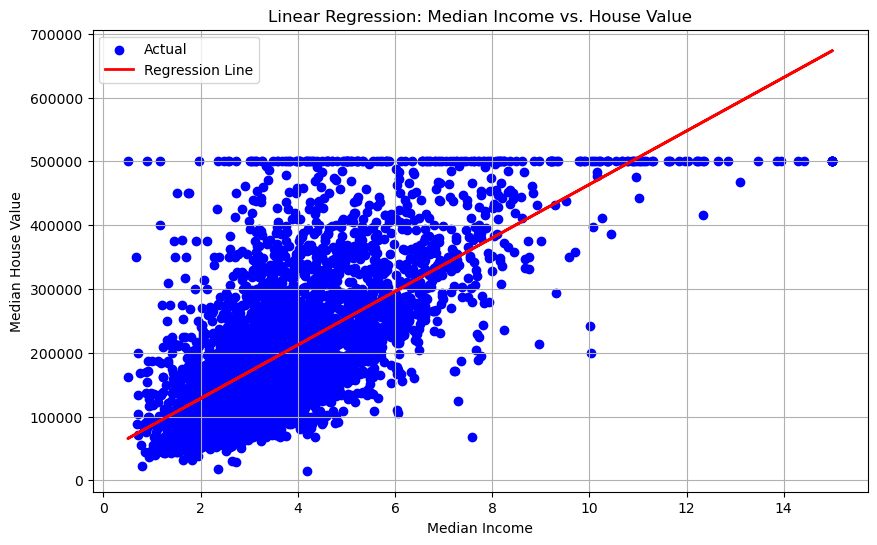

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Linear Regression: Median Income vs. House Value')
plt.legend()
plt.grid(True)
plt.show()


#### 10. Sample pridictions

In [44]:
# what will be the predictions for median_income = 6
model.predict([[6]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([296062.82553195])

#### 11. Conclusion

1. **Mean Squared Error (MSE):** This metric represents the average of the squared differences between the predicted and actual house values. In this case, the MSE appears large due to the high scale of house prices, which are typically in the hundreds of thousands.

2. **R-squared (R²) Score:** R² = 0.4589 → Our model explains around 45.9% of the variance in house prices using just median_income. This means the model captures a moderate relationship between income and house value.

3. * For a simple linear regression with only one feature, this is decent, not perfect, but it shows a meaningful trend.

4. * The simple linear regression model using median_income as the sole predictor explains about 46% of the variability in housing prices. While it's not highly accurate, it confirms that income is a significant factor affecting house prices. However, other factors also contribute to price variability and are not captured in this simple model.
